# MORINGA SCHOOL  -  PHASE III PROJECT

## Investigating Customer Churn in SyriaTel, A Telecommunication Company




## A Project by:
<br>

## KEVIN M. RIUNGU
<br>
<br>

## PROBLEM STATEMENT

Customer churn, also known as customer attrition or customer turnover, refers to the rate at which customers stop doing business with a company over a given period of time. It is a crucial metric for businesses, especially those in subscription-based industries or services, as it directly impacts the company's revenue and growth.
<br>
This project sets out to Investigate and analyze factors influencing customer churn in Syriatel using a comprehensive dataset from Kaggle. The project aims to identify patterns and key drivers of customer attrition, providing actionable insights and strategic recommendations to aid Syriatel's decision-makers in implementing effective customer retention strategies.
<br>
<br>

In [63]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [9]:
#Loading the dataset
df = pd.read_csv('SyriaTel_Customer_Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
#Size of our dataset
len(df)

3333

In [10]:
# Inspecting presence of Null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [13]:
# Checking the datatypes of the features
print(df.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [42]:
# "Area code" seems like a categorical variable encoded as numeric

df['area code'].value_counts()

area code
415    1655
510     840
408     838
Name: count, dtype: int64

In [41]:
# Convert 'area code' to categorical
df['area code'] = df['area code'].astype('category')


In [16]:
# Checking distribution of our target column
churn_counts = df['churn'].value_counts()
churn_counts

churn
False    2850
True      483
Name: count, dtype: int64

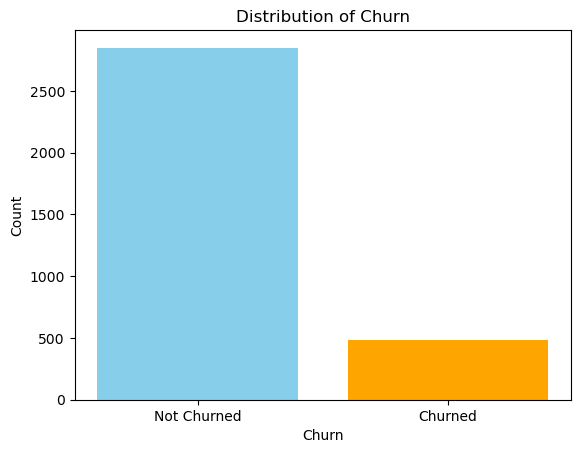

In [18]:
#Distribution of our target variable

plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(churn_counts.index, labels=['Not Churned', 'Churned'])
plt.show()


## Data Preparation

In [19]:
# Separate the target variable and predictor features
y = df['churn']
X = df.drop('churn', axis = 1)

In [25]:
# splitting training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)
print(len(X_train), len(X_test), len(y_train), len(y_test))

2499 834 2499 834


In [44]:
#One Hot Encoding Categorical Variables
X_train_categorical = X_train[['state', 'area code', 'international plan', 'voice mail plan']]

In [34]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(ohe.transform(X_train_categorical), index = X_train_categorical.index, 
                           columns = np.hstack(ohe.categories_))
X_train_ohe.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,VA,VT,WA,WI,WV,WY,no,yes,no,yes
2329,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [51]:
# Normalizing/ scaling numeric features
X_train_numeric = X_train[['account length', 'number vmail messages', 'total day minutes', 
                            'total day calls', 'total day charge']]
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_numeric), index = X_train_numeric.index, 
                              columns = X_train_numeric.columns)

In [52]:
# concatenating everything back together
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis = 1)
X_train_full.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,AK,AL,AR,AZ,CA,...,VA,VT,WA,WI,WV,WY,no,yes,no,yes
2329,0.561983,0.000000,0.298461,0.696970,0.298457,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1347,0.454545,0.000000,0.641106,0.709091,0.641013,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2994,0.524793,0.000000,0.649658,0.787879,0.649564,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1412,0.537190,0.470588,0.387400,0.363636,0.387324,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
96,0.297521,0.000000,0.456385,0.666667,0.456405,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## MODEL FITTING

In [54]:
#Fitting a Baseline Vanilla Logistic regression model
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

### Evaluating Baseline Model

#### Performance on Training Data

In [55]:

y_hat_train = logreg.predict(X_train_full)
print("Training Accuracy: ", accuracy_score(y_train, y_hat_train))

Training Accuracy:  0.860344137655062


In [57]:
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

       False       0.87      0.98      0.92      2136
        True       0.57      0.16      0.25       363

    accuracy                           0.86      2499
   macro avg       0.72      0.57      0.59      2499
weighted avg       0.83      0.86      0.83      2499



In [58]:
print(confusion_matrix(y_train, y_hat_train))

[[2091   45]
 [ 304   59]]


In [65]:
# Calculating the  precision, recall, and F1 score
precision = precision_score(y_train, y_hat_train)
recall = recall_score(y_train, y_hat_train)
f1 = f1_score(y_train, y_hat_train)
print("Training Precision =", precision)
print("Training recall =", recall)
print("Training F1 Score =", f1)

Training Precision = 0.5673076923076923
Training recall = 0.162534435261708
Training F1 Score = 0.25267665952890794


#### Performance on Test Data

In [ ]:
# We now process the test data separately to avoid the problem of leakage
